In [13]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [14]:
# creates a filled in numpy array of years from 2011 to 2021
censusYears = np.array([2011, 2021, 2022])

# Manchester Census Data
manchesterAgeCensus2011 = {
    "00-04": 36413,
    "05-09": 28617,
    "10-14": 26785,
    "15-19": 38302,
    "20-24": 66998,
    "25-29": 56595,
    "30-34": 45004,
    "35-39": 33970,
    "40-44": 32446,
    "45-49": 28637,
    "50-54": 23927,
    "55-59": 19633,
    "60-64": 18236,
    "65-69": 13191,
    "70-74": 11576,
    "75-79": 9378,
    "80+": 13399,
}


manchesterAgeCensus2021 = {
    "00-04": 34400,
    "05-09": 36600,
    "10-14": 36300,
    "15-19": 42400,
    "20-24": 61900,
    "25-29": 52600,
    "30-34": 48000,
    "35-39": 42000,
    "40-44": 35800,
    "45-49": 31100,
    "50-54": 30400,
    "55-59": 26700,
    "60-64": 21600,
    "65-69": 16400,
    "70-74": 13800,
    "75-79": 9200,
    "80+": 12700,
}

manchesterAgeCensus2022 = {
    "00-04": 34140,
    "05-09": 36416,
    "10-14": 36985,
    "15-19": 45520,
    "20-24": 68280,
    "25-29": 55762,
    "30-34": 48934,
    "35-39": 42106,
    "40-44": 36985,
    "45-49": 30726,
    "50-54": 30157,
    "55-59": 27312,
    "60-64": 22191,
    "65-69": 17070,
    "70-74": 13656,
    "75-79": 9673,
    "80+": 13087
}

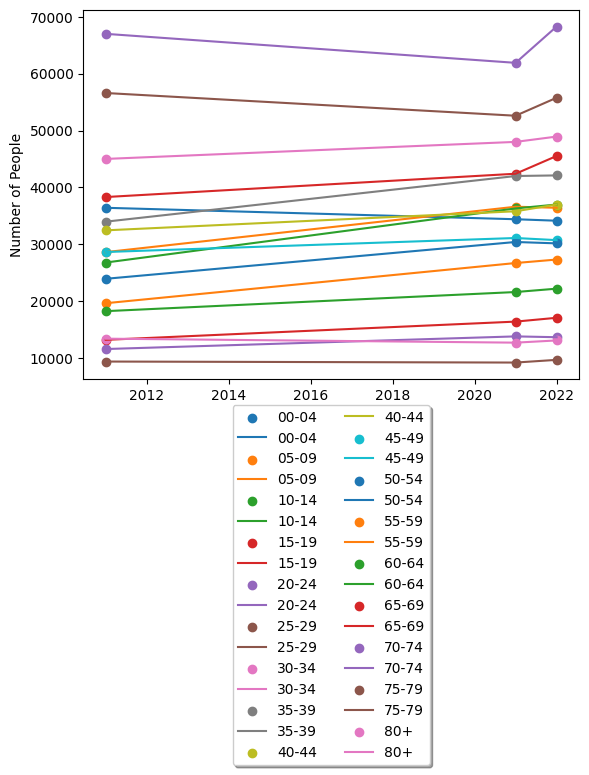

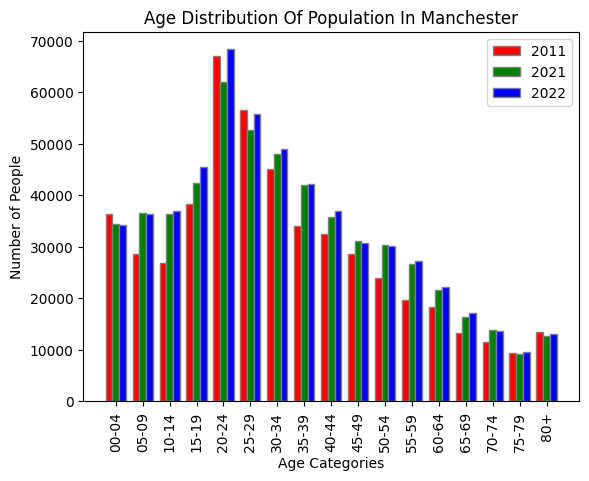

In [15]:
# Census Modelling For Number of People in Each Age Category In Manchester

# Gets the items in the census dictionary as a list then loops through it and plots 2011 vs 2021

for key, value in manchesterAgeCensus2022.items():
    # plots a line graph of the growth in population by age category over time
    plt.scatter(censusYears, [manchesterAgeCensus2011[key], manchesterAgeCensus2021[key], value], label=key)
    plt.plot(censusYears, [manchesterAgeCensus2011[key], manchesterAgeCensus2021[key], value], label=key)
    # labels the x axis
    plt.xlabel("Year")
    # labels the y axis
    plt.ylabel("Number of People")
    
# adds a legend below the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.show()

'''

# 2011 bar chart
plt.bar(manchesterAgeCensus2011.keys(), manchesterAgeCensus2011.values())
plt.title("2011 Census Data On Age Distribution In Manchester")
# rotates the x axis labels by 90 degrees
plt.xticks(rotation=90)
# labels the x axis
plt.xlabel("Age Categories")
# labels the y axis
plt.ylabel("Number of People")
plt.show()

# 2021 bar chart
plt.bar(manchesterAgeCensus2021.keys(), manchesterAgeCensus2021.values())
plt.title("2021 Census Data On Age Distribution In Manchester")
# rotates the x axis labels by 90 degrees
plt.xticks(rotation=90)
# labels the x axis
plt.xlabel("Age Categories")
# labels the y axis
plt.ylabel("Number of People")
plt.show()

# 2022 bar chart
plt.bar(manchesterAgeCensus2022.keys(), manchesterAgeCensus2022.values())
plt.title("2022 Census Data On Age Distribution In Manchester")
# rotates the x axis labels by 90 degrees
plt.xticks(rotation=90)
# labels the x axis
plt.xlabel("Age Categories")
# labels the y axis
plt.ylabel("Number of People")
plt.show()
'''

keys = sorted(manchesterAgeCensus2011.keys())

# Gets the values in the same order as keys
values2011 = [manchesterAgeCensus2011[key] for key in keys]
values2021 = [manchesterAgeCensus2021[key] for key in keys]
values2022 = [manchesterAgeCensus2022[key] for key in keys]

# Creates bar positions
barWidth = 0.25
r1 = np.arange(len(keys))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Plots bar chart
plt.bar(r1, values2011, color='r', width=barWidth, edgecolor='grey', label='2011')
plt.bar(r2, values2021, color='g', width=barWidth, edgecolor='grey', label='2021')
plt.bar(r3, values2022, color='b', width=barWidth, edgecolor='grey', label='2022')

# Adds xticks and rotates them 90 degrees
plt.xlabel('Age Categories')
plt.xticks([r + barWidth for r in range(len(values2011))], keys, rotation=90)

plt.ylabel("Number of People")
plt.title("Age Distribution Of Population In Manchester")

plt.legend()
plt.show()

In [16]:
# Brigton and Hove Census Data
brightonAgeCensus2011 = {
    "00-04": 15015,
    "05-09": 13291,
    "10-14": 13412,
    "15-19": 18039,
    "20-24": 28129,
    "25-29": 22998,
    "30-34": 21959,
    "35-39": 21789,
    "40-44": 21905,
    "45-49": 20443,
    "50-54": 15345,
    "55-59": 12638,
    "60-64": 12714,
    "65-69": 9535,
    "70-74": 7925,
    "75-79": 6676,
    "80+":11556
}

brightonAgeCensus2021 = {
    "00-04": 11700,
    "05-09": 13000,
    "10-14": 14200,
    "15-19": 17800,
    "20-24": 28000,
    "25-29": 21000,
    "30-34": 20500,
    "35-39": 19400,
    "40-44": 19300,
    "45-49": 20400,
    "50-54": 20900,
    "55-59": 18400,
    "60-64": 13600,
    "65-69": 10900,
    "70-74": 10300,
    "75-79": 7100,
    "80+": 10800,
}

brightonAgeCensus2022 = {
    "00-04": 11397,
    "05-09": 12786,
    "10-14": 14176,
    "15-19": 18346,
    "20-24": 28074,
    "25-29": 20569,
    "30-34": 20847,
    "35-39": 19458,
    "40-44": 19180,
    "45-49": 19180,
    "50-54": 21125,
    "55-59": 18902,
    "60-64": 14176,
    "65-69": 11119,
    "70-74": 9729,
    "75-79": 8061,
    "80+": 10563,
}

In [17]:
# Housing Data for Manchester from 
housingDataYears = np.array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
manchesterHousingData = {
    "Bungalow": np.array([
        1780,
        1840,
        1950,
        1990,
        2070,
        2140,
        2250,
        2310,
        2380,
        2420,
        2470,
        2500,
        2570,
        2620,
        2620,
        2670,
        2680,
        2690,
        2710,
        2760,
        2770,
        2780,
        2830,
        2830,
        2840,
        2840,
        2840,
        2850,
        2850,
    ]),
    "Flat / Maisonette": np.array([
        39620,
        40270,
        42600,
        44750,
        47210,
        48770,
        50210,
        51860,
        54060,
        56450,
        59080,
        61170,
        63280,
        65170,
        69390,
        74130,
        76120,
        77790,
        78420,
        78940,
        80210,
        80300,
        80600,
        81500,
        82470,
        83760,
        85420,
        88120,
        92150,
    ]),
    "Terraced House": np.array([
        59010,
        60770,
        62650,
        64670,
        66660,
        69360,
        71750,
        74100,
        76170,
        77070,
        77500,
        77840,
        77710,
        77680,
        78140,
        78600,
        78670,
        78550,
        78180,
        78390,
        78650,
        78740,
        78930,
        79340,
        79640,
        79860,
        80050,
        80260,
        80430,
    ]),
    "Semi-Detached House": np.array([
        39060,
        40350,
        41790,
        43140,
        44590,
        46310,
        47930,
        49360,
        50820,
        51500,
        51810,
        52020,
        52260,
        52340,
        52550,
        52790,
        52890,
        53010,
        53090,
        53280,
        53590,
        53850,
        54100,
        54540,
        54880,
        55150,
        55630,
        55990,
        56280,
    ]),
    "Detached House": np.array([
        2710,
        2860,
        3070,
        3290,
        3490,
        3730,
        3970,
        4210,
        4410,
        4540,
        4610,
        4740,
        4880,
        4990,
        5170,
        5320,
        5370,
        5440,
        5480,
        5530,
        5640,
        5730,
        5820,
        5910,
        5990,
        6080,
        6180,
        6240,
        6290,
    ]),
     "Annexe": np.array([
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        10,
        10,
        10,
        10,
        10,
        20,
        20,
        20,
        20,
        20,
        20,
        30,
        30,
        30,
        30,
        30,
     ]),
     "Mobile Home": np.array([
        80,
        80,
        80,
        90,
        90,
        80,
        90,
        90,
        90,
        90,
        90,
        90,
        90,
        90,
        90,
        90,
        90,
        90,
        90,
        90,
        110,
        110,
        110,
        110,
        110,
        120,
        120,
        120,
        120,
     ]),
      "Unknown": np.array([
        44810,
        41280,
        34400,
        30170,
        25090,
        19120,
        14680,
        10650,
        5890,
        2870,
        1450,
        800,
        400,
        350,
        330,
        350,
        330,
        300,
        290,
        280,
        350,
        330,
        320,
        320,
        340,
        460,
        650,
        670,
        670,
      ]),
}

# removes data in housing data from 1993 to 2002 as it is not relevant to the new shape of the data
manchesterHousingData = {k: v[9:] for k, v in manchesterHousingData.items()}
housingDataYears = housingDataYears[9:]


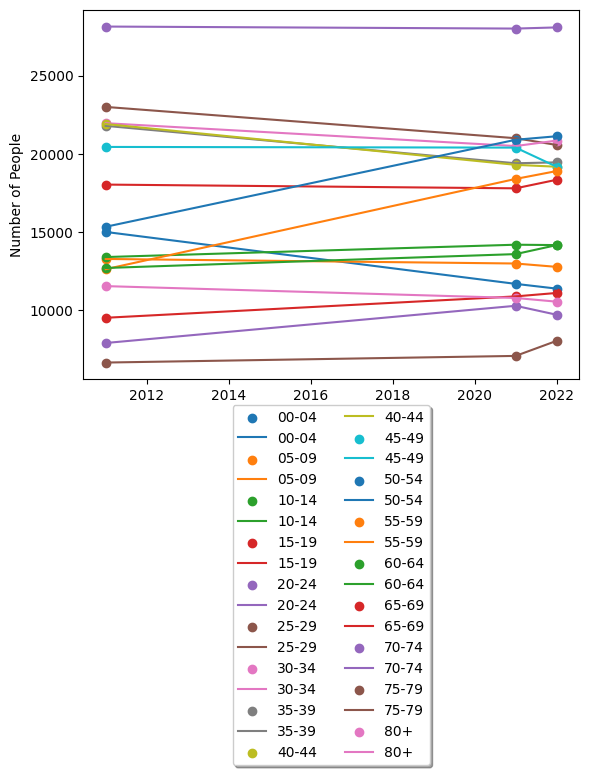

In [18]:
# Census Modelling For Number of People in Each Age Category In Brighton and Hove
# Census Modelling For Number of People in Each Age Category In Brighton
# Gets the items in the census dictionary as a list then loops through it and plots 2011 vs 2021

for key, value in brightonAgeCensus2022.items():
    # plots a line graph of the growth in population by age category over time
    plt.scatter(censusYears, [brightonAgeCensus2011[key], brightonAgeCensus2021[key], value], label=key)
    plt.plot(censusYears, [brightonAgeCensus2011[key], brightonAgeCensus2021[key], value], label=key)
    # labels the x axis
    plt.xlabel("Year")
    # labels the y axis
    plt.ylabel("Number of People")
    
# adds a legend below the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.show()

In [19]:
# Housing Data for Brighton and Hove
brightonhoveHousingData = {
    "Bungalow": np.array([
        5680,
        6180,
        6580,
        6930,
        7390,
        7700,
        7970,
        8210,
        8420,
        8640,
        8750,
        8780,
        8800,
        8830,
        8830,
        8840,
        8850,
        8850,
        8840,
        8840,
        8830,
        8830,
        8830,
        8820,
        8820,
        8820,
        8820,
        8810,
        8810,
    ]),
    "Flat / Maisonette": np.array([
        29190, 
        32430,
        35610,
        39200,
        42310,
        45350,
        48150, 
        51600, 
        54250, 
        56470, 
        58030, 
        58810, 
        59580, 
        60120, 
        60770, 
        61530, 
        61980, 
        62700, 
        63060, 
        63650, 
        63880, 
        64400, 
        65080, 
        65730, 
        66330, 
        66730, 
        67080, 
        67550, 
        68060, 
    ]),
    "Terraced House": np.array([
        15490, 
        16800, 
        18090, 
        19650, 
        21030, 
        22170, 
        23130, 
        24230, 
        25060,
        25830, 
        26370, 
        26580, 
        26800, 
        26920,
        27060, 
        27120, 
        27210, 
        27250, 
        27280, 
        27310, 
        27380, 
        27430, 
        27490, 
        27590, 
        27650, 
        27670, 
        27690, 
        27730, 
        27740, 
    ]),
    "Semi-Detached House": np.array([
        11020, 
        11900, 
        12600, 
        13310, 
        14080, 
        14620, 
        15100, 
        15700, 
        16120, 
        16570, 
        17150, 
        17240, 
        17320, 
        17360, 
        17390, 
        17420, 
        17460, 
        17470, 
        17490, 
        17510, 
        17540, 
        17560, 
        17590, 
        17600, 
        17630, 
        17640, 
        17650, 
        17690, 
        17700, 
    ]),
    "Detached House": np.array([
        4260,
        4580,
        4920,
        5360,
        5700,
        6010,
        6220,
        6500,
        6690,
        6870,
        6950,
        6990,
        7040,
        7050,
        7060,
        7100,
        7130,
        7170,
        7190,
        7220,
        7230,
        7260,
        7290,
        7310,
        7320,
        7340,
        7360,
        7380,
        7400,
    ]),
     "Annexe": np.array([
        0,
        0,
        0,
        0,
        10,
        10,
        10,
        10,
        10,
        10,
        10,
        10,
        10,
        20,
        20,
        30,
        30,
        40,
        40,
        50,
        50,
        60,
        70,
        70,
        70,
        90,
        90,
        90,
        100,
     ]),
     "Mobile Home": np.array([
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        10,
        10,
        10,
        10,
        20,
        20,
        20,
        20,
        20,
        20,
        20,
        70,
        40,
        30,
        70,
        80,
        70,
        80,
        80,
        80,
        70,
        70,

     ]),
      "Unknown": np.array([
        49010,
        42720,
        37820,
        32320,
        26800,
        22250,
        17870,
        12930,
        8680,
        5330,
        3060,
        2320,
        1940,
        1800,
        1720,
        1650,
        1570,
        1520,
        1490,
        1460,
        1490,
        1470,
        1420,
        1440,
        1440,
        1440,
        1450,
        1370,
        1360,
      ]),
}

# removes data in housing data from 1993 to 2002 as it is not relevant to the new shape of the data
brightonhoveHousingData = {k: v[9:] for k, v in brightonhoveHousingData.items()}

Bungalow r2 score: 0.8640186915887837
Bungalow 2024: 9620
Bungalow 2034: 10050
Bungalow 2044: 10480
Bungalow 2074: 11770
Flat / Maisonette r2 score: 0.9873946830833413
Flat / Maisonette 2024: 70155
Flat / Maisonette 2034: 75817
Flat / Maisonette 2044: 81479
Flat / Maisonette 2074: 98466
Terraced House r2 score: 0.8529825826903722
Terraced House 2024: 28185
Terraced House 2034: 28969
Terraced House 2044: 29753
Terraced House 2074: 32105
Semi-Detached House r2 score: 0.6940071671508108
Semi-Detached House 2024: 17898
Semi-Detached House 2034: 18257
Semi-Detached House 2044: 18616
Semi-Detached House 2074: 19692
Detached House r2 score: 0.9785166259194018
Detached House 2024: 7505
Detached House 2034: 7762
Detached House 2044: 8020
Detached House 2074: 8792
Annexe r2 score: 0.9752456762674174
Annexe 2024: 112
Annexe 2034: 163
Annexe 2044: 214
Annexe 2074: 367
Mobile Home r2 score: 0.7863466613553771
Mobile Home 2024: 98
Mobile Home 2034: 140
Mobile Home 2044: 182
Mobile Home 2074: 309





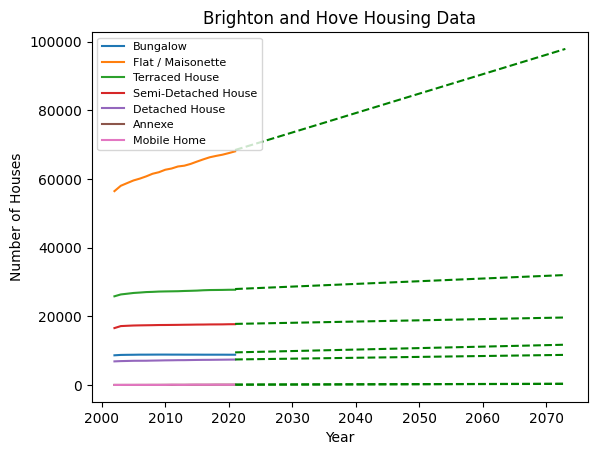

In [20]:
# Turns housing data into a list then loops through it plotting a graph of each type of housing
totalHouses = {
    "2024": 0,
    "2034": 0,
    "2044": 0,
    "2074": 0,
}

for key, value in list(brightonhoveHousingData.items()):
    if key != "Unknown":
        plt.plot(housingDataYears, value, label=key)
        # plots linear regression line
        m, b = np.polyfit(housingDataYears, value, 1)
        # calculates the r2 score
        r2 = r2_score(value, m*housingDataYears + b)

        # does seperate linear regression for bungalows as the graph suggests there is a boom in bungalows prior to 2007 and then a slow decline
        # therefore taking into account the boom in our linear regression would not be accurate to the current trend of the data
        if key == "Bungalow":
            bungalowHousingData = value[:5]
            m, b = np.polyfit(housingDataYears[:5], bungalowHousingData, 1)
            r2 = r2_score(bungalowHousingData, m*housingDataYears[:5] + b)

        print(f"{key} r2 score: {r2}")
        # extrapolates the data to 2054 and plots it
        futureYears = np.arange(2021, 2074)
        futureValues = m*futureYears + b
        plt.plot(futureYears, futureValues, "g--")

        # adds the future values to the total houses
        totalHouses["2024"] += round(m*2024 + b)
        totalHouses["2034"] += round(m*2034 + b)
        totalHouses["2044"] += round(m*2044 + b)
        totalHouses["2074"] += round(m*2074 + b)

        print(f"{key} 2024: {round(m*2024 + b)}")
        print(f"{key} 2034: {round(m*2034 + b)}")
        print(f"{key} 2044: {round(m*2044 + b)}")
        print(f"{key} 2074: {round(m*2074 + b)}")

print("\n\n\n")
print("Total Houses: ")
print(totalHouses)
# adds a legend below the graph
plt.legend(loc="upper left", fontsize=8)
plt.title("Brighton and Hove Housing Data")
plt.xlabel("Year")
plt.ylabel("Number of Houses")
plt.show()


Bungalow r2 score: 0.9873617693522952
Bungalow 2024: 3516
Bungalow 2034: 4016
Bungalow 2044: 4516
Bungalow 2074: 6016
Flat / Maisonette r2 score: 0.9278925346033555
Flat / Maisonette 2024: 96167
Flat / Maisonette 2034: 112523
Flat / Maisonette 2044: 128878
Flat / Maisonette 2074: 177943
Terraced House r2 score: 0.9232982117852918
Terraced House 2024: 80661
Terraced House 2034: 82220
Terraced House 2044: 83779
Terraced House 2074: 88457
Semi-Detached House r2 score: 0.9658014981750819
Semi-Detached House 2024: 56541
Semi-Detached House 2034: 58912
Semi-Detached House 2044: 61283
Semi-Detached House 2074: 68397
Detached House r2 score: 0.9862068360046266
Detached House 2024: 6642
Detached House 2034: 7558
Detached House 2044: 8473
Detached House 2074: 11220
Annexe r2 score: 0.9339796860572497
Annexe 2024: 38
Annexe 2034: 56
Annexe 2044: 74
Annexe 2074: 128
Mobile Home r2 score: 0.8115099068425782
Mobile Home 2024: 126
Mobile Home 2034: 145
Mobile Home 2044: 165
Mobile Home 2074: 224






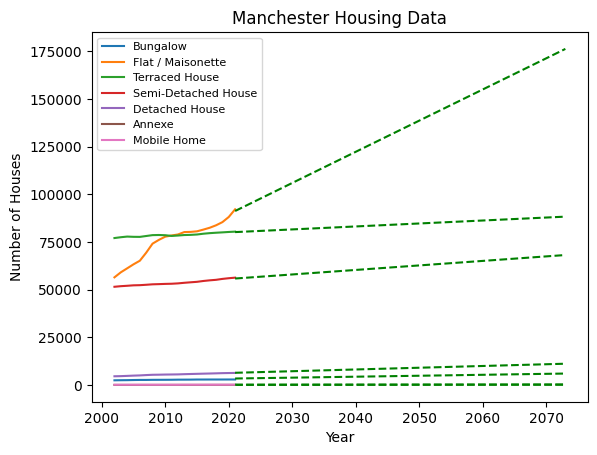

In [21]:
# Turns housing data into a list then loops through it plotting a graph of each type of housing
totalHouses = {
    "2024": 0,
    "2034": 0,
    "2044": 0,
    "2074": 0,
}

for key, value in list(manchesterHousingData.items()):
    if key != "Unknown":
        plt.plot(housingDataYears, value, label=key)
        # plots linear regression line
        m, b = np.polyfit(housingDataYears, value, 1)
        # calculates the r2 score
        r2 = r2_score(value, m*housingDataYears + b)

        # does seperate linear regression for bungalows as the graph suggests there is a boom in bungalows prior to 2007 and then a slow decline
        # therefore taking into account the boom in our linear regression would not be accurate to the current trend of the data
        if key == "Bungalow":
            bungalowHousingData = value[:5]
            m, b = np.polyfit(housingDataYears[:5], bungalowHousingData, 1)
            r2 = r2_score(bungalowHousingData, m*housingDataYears[:5] + b)

        print(f"{key} r2 score: {r2}")
        # extrapolates the data to 2054 and plots it
        futureYears = np.arange(2021, 2074)
        futureValues = m*futureYears + b
        plt.plot(futureYears, futureValues, "g--")

        # adds the future values to the total houses
        totalHouses["2024"] += round(m*2024 + b)
        totalHouses["2034"] += round(m*2034 + b)
        totalHouses["2044"] += round(m*2044 + b)
        totalHouses["2074"] += round(m*2074 + b)

        print(f"{key} 2024: {round(m*2024 + b)}")
        print(f"{key} 2034: {round(m*2034 + b)}")
        print(f"{key} 2044: {round(m*2044 + b)}")
        print(f"{key} 2074: {round(m*2074 + b)}")

print("\n\n\n")
print("Total Houses: ")
print(totalHouses)
# adds a legend below the graph
plt.legend(loc="upper left", fontsize=8)
plt.title("Manchester Housing Data")
plt.xlabel("Year")
plt.ylabel("Number of Houses")
plt.show()

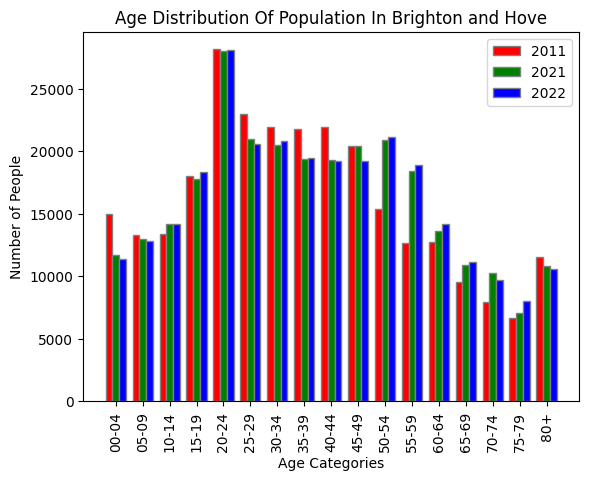

In [22]:
manchesterAgeCensus2022 = {
    "00-04": 34140,
    "05-09": 36416,
    "10-14": 36985,
    "15-19": 45520,
    "20-24": 68280,
    "25-29": 55762,
    "30-34": 48934,
    "35-39": 42106,
    "40-44": 36985,
    "45-49": 30726,
    "50-54": 30157,
    "55-59": 27312,
    "60-64": 22191,
    "65-69": 17070,
    "70-74": 13656,
    "75-79": 9673,
    "80+": 13087
}

keys = sorted(brightonAgeCensus2011.keys())

# Gets the values in the same order as keys
values2011 = [brightonAgeCensus2011[key] for key in keys]
values2021 = [brightonAgeCensus2021[key] for key in keys]
values2022 = [brightonAgeCensus2022[key] for key in keys]

# Creates bar positions
barWidth = 0.25
r1 = np.arange(len(keys))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Plots bar chart
plt.bar(r1, values2011, color='r', width=barWidth, edgecolor='grey', label='2011')
plt.bar(r2, values2021, color='g', width=barWidth, edgecolor='grey', label='2021')
plt.bar(r3, values2022, color='b', width=barWidth, edgecolor='grey', label='2022')

# Adds xticks and rotates them 90 degrees
plt.xlabel('Age Categories')
plt.xticks([r + barWidth for r in range(len(values2011))], keys, rotation=90)

plt.ylabel("Number of People")
plt.title("Age Distribution Of Population In Brighton and Hove")

plt.legend()
plt.show()

15-19 r2 score: 0.9848652937019011
20-24 r2 score: 0.9491715191079568
25-29 r2 score: 0.7229142387253068
30-34 r2 score: 0.38327105275643003
35-39 r2 score: 0.2346394733637024
40 and over r2 score: 0.9031005804683279


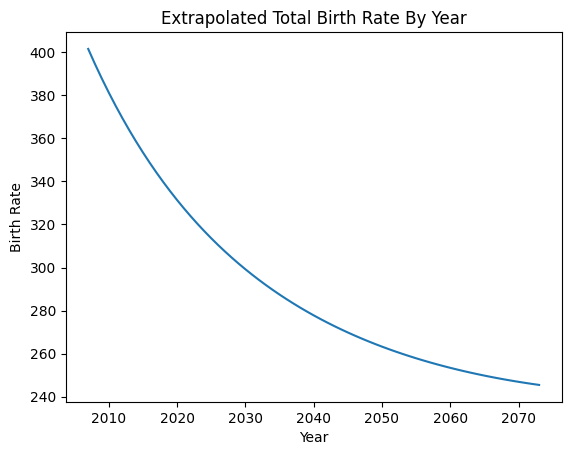

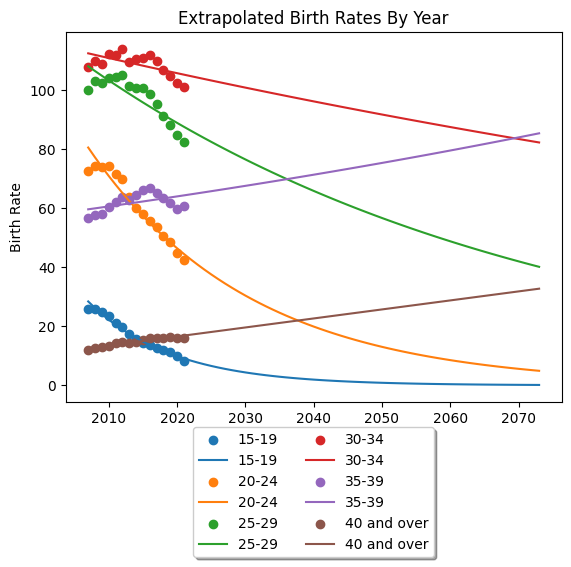

In [48]:
# Q2 model for birth rate probabilities per age group
birthRatesData = {
    "15-19": np.array([
        8.3,
        10.0,
        11.2,
        11.9,
        12.7,
        13.7,
        14.5,
        15.6,
        17.4,
        19.9,
        21.2,
        23.4,
        24.8,
        25.7,
        25.9,
        26.6,
        26.4,
    ]),
    "20-24": np.array([
        42.3,
        44.8,
        48.4,
        50.5,
        53.7,
        55.8,
        58.0,
        60.1,
        63.7,
        69.9,
        71.6,
        74.1,
        73.9,
        74.1,
        72.6,
        72.1,
        70.5,
    ]),
    "25-29": np.array([
        82.5,
        84.6,
        88.3,
        91.3,
        95.3,
        98.8,
        100.8,
        100.8,
        101.5,
        105.1,
        104.3,
        104.1,
        102.4,
        103.0,
        100.1,
        97.9,
        96.0,
    ]),
    "30-34": np.array([
        101.1,
        102.5,
        104.7,
        106.8,
        109.8,
        112.0,
        111.0,
        110.4,
        109.4,
        113.9,
        111.9,
        112.3,
        108.7,
        109.8,
        107.8,
        103.4,
        99.9,
    ]),
    "35-39": np.array([
        60.8,
        59.8,
        61.9,
        63.4,
        65.1,
        66.9,
        66.0,
        64.5,
        62.9,
        63.7,
        62.1,
        60.3,
        58.1,
        57.8,
        56.5,
        53.6,
        50.3,
    ]),
    "40 and over": np.array([
        15.9,
        16.0,
        16.5,
        16.1,
        16.1,
        15.9,
        15.2,
        14.7,
        14.5,
        14.6,
        14.2,
        13.4,
        12.9,
        12.6,
        12.0,
        11.4,
        10.8,
    ])
}

# flips the birth rates data so that the years are in ascending order
birthRatesData = {k: v[::-1] for k, v in birthRatesData.items()}

# removes the first 2 years of data as it is not relevant to the new shape of the data
birthRatesData = {k: v[2:] for k, v in birthRatesData.items()}

birthRateYears = np.arange(2007, 2022)

totalBirthRateByYear = np.zeros(2074-2007)

extrapolatedBirthRates = {k: np.array([]) for k in birthRatesData.keys()}

# loops through the birth rates data and plots a graph of each age group
for key, value in birthRatesData.items():
    # plots a line graph of the growth in population by age category over time
    #plt.plot(birthRateYears, value, label=key)

    # plots a logarithmic regression line
    birthRateGradient, birthRateYIntercept = np.polyfit(birthRateYears, np.log(value), 1)

    # calculates the r2 score
    r2 = r2_score(np.log(value), birthRateGradient*birthRateYears + birthRateYIntercept)

    # does linear regression for over 40s as the graph suggests there is a unrealistically large increase in birth rates over time
    if key == "40 and over":
        birthRateGradient, birthRateYIntercept = np.polyfit(birthRateYears, value, 1)
        r2 = r2_score(value, birthRateGradient*birthRateYears + birthRateYIntercept)

    print(f"{key} r2 score: {r2}")
    # extrapolates the data to 2054 and plots it
    futureYears = np.arange(2007, 2074)
    futureValues = np.exp(birthRateGradient*futureYears + birthRateYIntercept)
    if key == "40 and over":
        futureValues = birthRateGradient*futureYears + birthRateYIntercept

    # adds the future values to the total birth rate by year
    totalBirthRateByYear += futureValues

    # adds the future values to the extrapolated birth rates
    extrapolatedBirthRates[key] = futureValues
    #plt.plot(futureYears, futureValues, "g--")
    #plt.title(f"Birth Rates For {key} Age Group")
    #plt.xlabel("Year")
    #plt.ylabel("Birth Rate")
    #plt.show()

# plots the total birth rate by year
plt.plot(np.arange(2007, 2074), totalBirthRateByYear)
plt.title("Extrapolated Total Birth Rate By Year")
plt.xlabel("Year")
plt.ylabel("Birth Rate")
plt.show()

# Plots the extrapolated birth rates in one graph
for key, value in extrapolatedBirthRates.items():
    plt.scatter(birthRateYears, birthRatesData[key], label=key)
    plt.plot(np.arange(2007, 2074), value, label=key)
plt.title("Extrapolated Birth Rates By Year")
plt.xlabel("Year")
plt.ylabel("Birth Rate")
# Places legend below the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()


{'00-04': 341.4, '05-09': 364.16, '10-14': 369.85, '15-19': 455.2, '20-24': 682.8, '25-29': 557.62, '30-34': 489.34, '35-39': 421.06, '40-44': 369.85, '45-49': 307.26, '50-54': 301.57, '55-59': 273.12, '60-64': 221.91, '65-69': 170.7, '70-74': 136.56, '75-79': 96.73, '80+': 130.87}
{'00-04': 5448.031564773917, '05-09': 43.42420806925668, '10-14': 44.05846835643844, '15-19': 53.84165347321416, '20-24': 80.28082383425097, '25-29': 65.22453373220985, '30-34': 56.753028854733806, '35-39': 48.10281361845959, '40-44': 41.64652278558489, '45-49': 33.01938464319743, '50-54': 30.75201786796718, '55-59': 25.60444824460753, '60-64': 17.966876347381405, '65-69': 11.039652290511041, '70-74': 6.096068535107154, '75-79': 2.0375641029093794, '80+': 0.036578388310612116}


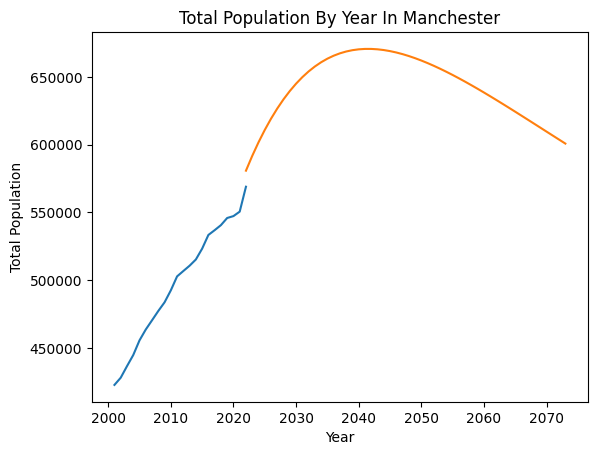

In [69]:
# Q2 Monte Carlo Simululation for population growth in Manchester and Brighton and Hove over 5 year periods
# Manchester

# deaths for each age category
deathRates = {
    "00-04": 0.0009,
    "05-09": 0.0000737,
    "10-14": 0.000093,
    "15-19": 0.0002297,
    "20-24": 0.0003447,
    "25-29": 0.0004441,
    "30-34": 0.0006076,
    "35-39": 0.0008975,
    "40-44": 0.001175,
    "45-49": 0.002072,
    "50-54": 0.003078,
    "55-59": 0.004689,
    "60-64": 0.007491,
    "65-69": 0.01177,
    "70-74": 0.01879,
    "75-79": 0.03286,
    "80+": 0.1456,
}

pastPopulationData2001to2022 = np.array([
    422915,
    428221,
    436727,
    444925,
    455745,
    463749,
    470538,
    477408,
    483784,
    492598,
    502902,
    506869,
    510783,
    515360,
    523321,
    533446,
    536961,
    540675,
    545947,
    547340,
    550630,
    568996,
])

# age category order
ageCategories = ["00-04", "05-09", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+"]

numberOfPeopleByAgeCategoryInHundreds = manchesterAgeCensus2022
# divides the number of people in each age category by 1000 to get the number of people in each age category in Hundreds
numberOfPeopleByAgeCategoryInHundreds = {k: v/100 for k, v in numberOfPeopleByAgeCategoryInHundreds.items()}
totalPopulationByYear = np.array([])
print(numberOfPeopleByAgeCategoryInHundreds)

# loops through from year 2022 to 2074

for year in range(2022, 2074, 1):
    for ageCategory, numberOfPeople in numberOfPeopleByAgeCategoryInHundreds.items():
        if ageCategory in extrapolatedBirthRates:
            # adds the number of births to the number of people in each age category
            numberOfBirthsInHundreds = extrapolatedBirthRates[ageCategory][year-2022]
            numberOfPeopleByAgeCategoryInHundreds["00-04"] += numberOfBirthsInHundreds
        # calculates the number of deaths for each age category
        numberOfDeathsInHundreds = deathRates[ageCategory]*numberOfPeople
        # subtracts the number of deaths from the number of people in each age category
        numberOfPeopleByAgeCategoryInHundreds[ageCategory] -= numberOfDeathsInHundreds
    
    # increments by 5 years
    for ageCategory, numberOfPeople in numberOfPeopleByAgeCategoryInHundreds.items():
        nextAgeCategoryIndex = ageCategories.index(ageCategory) + 1
        if nextAgeCategoryIndex < len(ageCategories):
            nextAgeCategory = ageCategories[nextAgeCategoryIndex]
            numberOfPeopleByAgeCategoryInHundreds[ageCategory] += numberOfPeopleByAgeCategoryInHundreds[ageCategory] / 5
            numberOfPeopleByAgeCategoryInHundreds[ageCategory] -= numberOfPeopleByAgeCategoryInHundreds[ageCategory] / 5
    # adds the total population to the total population by year
    totalPopulationByYear = np.append(totalPopulationByYear, sum(numberOfPeopleByAgeCategoryInHundreds.values()))


print(numberOfPeopleByAgeCategoryInHundreds)

# plots past population data
plt.plot(np.arange(2001, 2023), pastPopulationData2001to2022)

# plots the total population by year
plt.plot(np.arange(2022, 2074), totalPopulationByYear*100)
plt.title("Total Population By Year In Manchester")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.show()